goal is to train a model so that when we give him the price we spend on it give us predicted sales that we can have

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
data=pd.read_csv("Advertising.csv",index_col=0)
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


Dataset is of aderstising company who start their adverstisements on products like TV ,RADIO ,NEWSPAPER and SALES. the dataset tells about the total about of monry spend on tv radio newspaper and final column of sales show how much sales is generated in this

In [4]:
sample=data.head(10)
sample

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


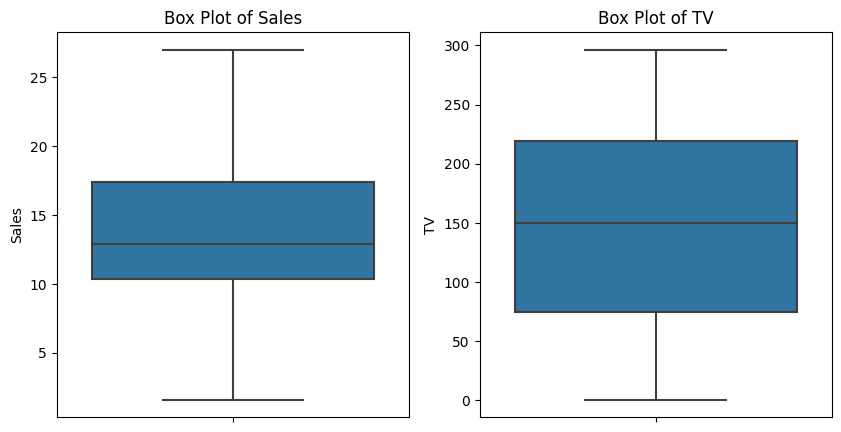

In [5]:
# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create box plots for Sales and TV
sns.boxplot(ax=axes[0], y=data["Sales"])
axes[0].set_title("Box Plot of Sales")

sns.boxplot(ax=axes[1], y=data["TV"])
axes[1].set_title("Box Plot of TV")

# Show the plots
plt.show()


<AxesSubplot:xlabel='Sales', ylabel='TV'>

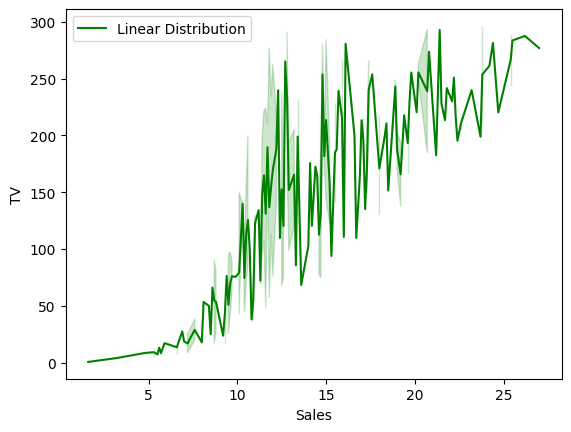

In [6]:
sns.lineplot(x=data["Sales"], y=data["TV"], label='Linear Distribution', color='green')

In [7]:
df=data.copy()

In [8]:
columns_to_normalize = ['Sales', 'TV', 'Radio',"Newspaper"]
df[columns_to_normalize] = df[columns_to_normalize].apply(stats.zscore)
df

,TV,Radio,Newspaper,Sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
196,-1.270941,-1.321031,-0.771217,-1.234053
197,-0.617035,-1.240003,-1.033598,-0.830548
198,0.349810,-0.942899,-1.111852,-0.234898
199,1.594565,1.265121,1.640850,2.205347


In [9]:
df.shape

(200, 4)

In [10]:
def cost_function(w,x,b):
    cost=0
    cost =cost+(np.dot(w,x))+b
    return cost

In [11]:
def compute_gradient(w,x,b,a):
    
    m=x.shape()[0]
    cost=0
    for item in m:
        
        f_wb_i=np.dot(w[item],x[item])+b
        cost = cost+(f_wb_i-y[i])**2
    return cost/(2*m)
    


In [12]:
def gradientdescent(w,x,a,b):

    m,n=x.shape()
    dj_dw=np.zeros()
    dj_db=0
    for item in range(m):
        err = (np.dot(x[item],w)+b)-y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*x[item,j]

        dj_db=dj_db+err
    dj_db=dj_db/m
    dj_dw=dj_dw/m

    return dj_db,dj_dw

In [13]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_of_iters):
    J_history=[]
    w=w_in
    b=b_in
    # j_history=[]
    for i in range(num_of_iters):
        dj_db,dj_dw=gradient_function(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i<100000:
            J_history.append(cost_function(x,y,w,b))

    return w, b, J_history

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
x=df.drop("Sales",axis=1)
y=df['Sales']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,shuffle=True)


In [27]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error

In [32]:
# e=accuracy_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print(mse)


0.17292119021533608
